In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import plotting
import itertools
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

#total number of stocks is 2234 (all stock have been filtered)

def get_returns(number_of_stocks):
    with open('filtered_stocks.bin', 'rb') as f:
        data = pickle.load(f)
    prices = data[:,:number_of_stocks]
    returns = (np.diff(prices, axis = 0) / prices[:-1,:]) / 2
    number_of_stocks = np.arange(number_of_stocks)
    results = itertools.combinations(number_of_stocks,2)
    combos = np.array(list(results))
    pairs_ret = np.zeros((2770 - 1002, len(combos)))
    print(pairs_ret.shape)
    for i, combo in enumerate(combos):
        pairs_ret[:,i] = np.array(returns[:,combo[0]] - returns[:,combo[1]])
    
    column_means = np.mean(pairs_ret, axis = 0)
    matrix_column_means = np.tile(column_means, (len(pairs_ret),1))

    # pairs_ret_minus_column_means = pairs_ret - matrix_column_means
    # return pairs_ret_minus_column_means, column_means
    return pairs_ret, column_means

In [18]:
S, mu = get_returns(20)
returns = np.cov(S.T)


(1768, 190)


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

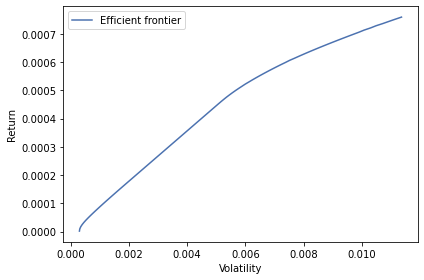

In [25]:
ef = EfficientFrontier(mu, returns)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

In [ ]:
S.shape


(1768, 1768)

In [16]:
mu.shape

(190,)